In [27]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe

In [40]:
source_noise = 'DnaA' #options 'lipids' or 'DnaA'
file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_'+source_noise

parameter_path = os.path.join(file_path, 'parameter_set.csv')

In [41]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [42]:
v_init_exp = 0.28
std_exp = 0.05

In [43]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame.simu_name

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/variances_models_no_titr_seqA.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/variances_models.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/LDDR_rida_400',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/full_model_rida_400_noise',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/switch_titration_DnaA_noise',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/titration_only',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S13_LDDR_titration_SeqA/variance_DnaA/Fig_3C_poster.pdf',
 '/home/berger/Documents/Arbeit/

0                   LDDR_rida_400
1                   LDDR_rida_400
2                   LDDR_rida_400
3                   LDDR_rida_400
4                   LDDR_rida_400
5                   LDDR_rida_400
6                   LDDR_rida_400
7                   LDDR_rida_400
8                   LDDR_rida_400
9                   LDDR_rida_400
10                  LDDR_rida_400
11                  LDDR_rida_400
12                  LDDR_rida_400
13                  LDDR_rida_400
14                  LDDR_rida_400
15                  LDDR_rida_400
16                  LDDR_rida_400
17                  LDDR_rida_400
18                  LDDR_rida_400
19                  LDDR_rida_400
20      full_model_rida_400_noise
21      full_model_rida_400_noise
22      full_model_rida_400_noise
23      full_model_rida_400_noise
24      full_model_rida_400_noise
25      full_model_rida_400_noise
26      full_model_rida_400_noise
27      full_model_rida_400_noise
28      full_model_rida_400_noise
29      full_m

# Calculate initiation volume theoretically

In [44]:
def calculate_v_initi_no_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((production_rate_dars1+ df.production_rate_dars2)/df.production_rate_lipids)

def calculate_v_initi_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return (df.destruction_rate_datA + df.high_rate_datA + df.destruction_rate_rida) / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))- \
           ((production_rate_dars1 + df.production_rate_dars2 + df.high_rate_dars2)/df.production_rate_lipids)

data_frame["v_init_per_n_ori_th_no_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame["v_init_per_n_ori_th_o_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame.v_init_per_n_ori

0     0.334245
1     0.639803
2     0.351928
3     0.359639
4     0.651809
5     0.351530
6     0.614008
7     0.542899
8     0.397836
9     0.428850
10    0.590748
11    0.424497
12    0.544773
13    0.353776
14    0.671782
15    0.383314
16    0.494215
17    0.299896
18    0.300270
19    0.460674
20    0.412109
21    0.442081
22    0.430996
23    0.434438
24    0.442205
25    0.414891
26    0.443523
27    0.445884
28    0.451465
29    0.467473
        ...   
40    0.367153
41    0.374907
42    0.333267
43    0.346761
44    0.330978
45    0.326714
46    0.372539
47    0.335427
48    0.357176
49    0.354379
50    0.262411
51    0.090087
52    0.240652
53    0.235354
54    0.093276
55    0.250626
56    0.212916
57    0.131601
58    0.137552
59    0.135899
60    0.086118
61    0.139355
62    0.134385
63    0.251216
64    0.092165
65    0.224470
66    0.135434
67    0.252798
68    0.246777
69    0.140963
Name: v_init_per_n_ori, Length: 70, dtype: float64

In [45]:
def calculate_v_init_switch_synthesis(df):
    if df.include_synthesis==0:
        return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
               (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
               ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))
    else:
        return (df.destruction_rate_datA/df.total_conc) * \
                df.frac_init / (df.michaelis_const_destr/df.total_conc+ df.frac_init) * \
                (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init) / \
                ((1- df.frac_init) * \
                (df.production_rate_lipids/df.total_conc + df.rate_growth * (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init)))
    
data_frame["v_init_per_n_ori_synthesis"] = data_frame.apply(lambda row: calculate_v_init_switch_synthesis(row), axis=1)


# Calculate CV

In [46]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    print(simu_name)
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

LDDR_rida_400
full_model_rida_400_noise
switch_titration_DnaA_noise
titration_only


# Calculate variance at different growth rates

In [47]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def calculate_CV_v_init(row):
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    return np.std(v_init_np[10:])/np.mean(v_init_np[10:])

In [48]:
data_frame["CV_v_init"] = data_frame.apply(lambda row: calculate_CV_v_init(row), axis=1)
data_frame.CV_v_init

0     0.181466
1     0.008963
2     0.099226
3     0.081115
4     0.008586
5     0.124523
6     0.009903
7     0.015536
8     0.069976
9     0.067136
10    0.011001
11    0.060091
12    0.028413
13    0.115903
14    0.007460
15    0.082150
16    0.036644
17    0.137019
18    0.155141
19    0.041773
20    0.048286
21    0.006019
22    0.018919
23    0.017450
24    0.005678
25    0.027359
26    0.006414
27    0.008639
28    0.013740
29    0.011524
        ...   
40    0.054939
41    0.030564
42    0.022772
43    0.019915
44    0.010371
45    0.007780
46    0.014263
47    0.011086
48    0.025725
49    0.041047
50    0.065260
51    0.337652
52    0.036702
53    0.038586
54    0.328061
55    0.043310
56    0.344698
57    0.226493
58    0.179917
59    0.245818
60    0.250290
61    0.247629
62    0.232539
63    0.037127
64    0.318392
65    0.061182
66    0.238527
67    0.050298
68    0.059209
69    0.244383
Name: CV_v_init, Length: 70, dtype: float64

# Make Legends

In [49]:
def make_production_rate_datA_lipids_cv_legend(destruction_rate_datA, production_rate_lipids, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, $\alpha_{{\rm lipids}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3), 
                                                                                       np.round(cv,3))

def make_production_rate_datA_cv_legend(destruction_rate_datA, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3),
                                                        np.round(cv,3))

def make_production_rate_datA_legend(destruction_rate_datA):
    return r'$\beta_{{\rm datA}}={}$ min$^{{-1}}$'.format(int(destruction_rate_datA/60))

def make_production_rate_datA_lipids_legend(destruction_rate_datA, production_rate_lipids):
    return r'$\beta_{{\rm datA}}={}$ /h, \linebreak  $\alpha_{{\rm lipids}}={}$ /h'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3))

def make_theoretical_v_init_legend(v_init_per_n_ori_th_no_time_varying):
    return r'$v^\ast_{{\rm th}}={} \, \mu $m$^3$'.format(np.round(v_init_per_n_ori_th_no_time_varying,3))

def make_legend_model(version_of_model, n_sites, block_production):
    if version_of_model == 'titration':
        if block_production == 0:
            return 'titration'
        else:
            return 'titration+SeqA'
    if n_sites==0:
        return 'LDDR'
    else:
        if block_production == 0:
            return 'LDDR+titration'
        else:
            return 'LDDR+titration+SeqA'

def make_order(legend_models):
    if legend_models == 'titration':
        return 1
    if legend_models == 'titration+SeqA':
        return 2
    if legend_models == 'LDDR':
        return 3
    if legend_models == 'LDDR+titration':
        return 4
    if legend_models == 'LDDR+titration+SeqA':
        return 5
    


data_frame.loc[:, 'legend_datA_lipids_cv'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_cv_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA_cv'] = data_frame.apply(lambda row: make_production_rate_datA_cv_legend(row.destruction_rate_datA,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA'] = data_frame.apply(lambda row: make_production_rate_datA_legend(row.destruction_rate_datA), axis = 1)

data_frame.loc[:, 'legend_datA_lipids'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids), axis = 1)

data_frame.loc[:, 'legend_v_init_th'] = data_frame.apply(lambda row: make_theoretical_v_init_legend(row.v_init_per_n_ori_th_no_time_varying), axis = 1)

data_frame.loc[:, 'legend_models'] = data_frame.apply(lambda row: make_legend_model(row.version_of_model, row.n_c_max_0, row.block_production), axis = 1)

data_frame.loc[:, 'legend_order'] = data_frame.apply(lambda row: make_order(row.legend_models), axis = 1)


# Determine minimal activator fraction

In [50]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot amplitude time varying

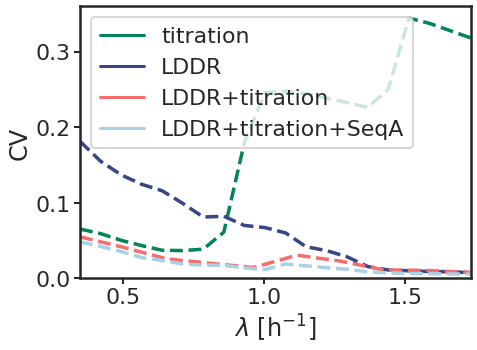

In [51]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(
    x='rate_growth', 
    y='CV_v_init',
    data=data_frame.sort_values(by=["legend_order"]),
    hue='legend_models',
#     dashes=[(4, 1), (4, 1), (4, 1), (4, 1)],
    markers=True,
    palette= [green, blue, pinkish_red, light_blue],#, yellow],
    linewidth = 3.5,
    ax=ax
);
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.lines[4].set_linestyle("--")
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'CV')
# plt.legend(labels=legend
ax.set(ylim=(0,0.36))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/variances_models_'+source_noise+'.pdf', format='pdf', bbox_inches='tight')